In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
import seaborn as sns
%matplotlib inline

In [7]:
#Задание 1. Загрузить файл
data=pd.read_csv('C:/Users/Katya/Desktop/HR.csv')

In [31]:
#Задание 2. Посчитать основные статистические показатели
data.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [15]:
data.mode()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.1             0.55             4.0                   135   
1                 NaN              NaN             NaN                   156   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                 3.0            0.0   0.0                    0.0  sales   
1                 NaN            NaN   NaN                    NaN    NaN   

  salary  
0    low  
1    NaN

In [34]:
#Задание 3. Посчитать и визуализировать корреционную матрицу
corr=data.corr()
corr

satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours               1.000000            0.127755   
time_spend_company                 0.127755            1.000000   
Work_accident                     -0.010143            0.002120   
left                               0.071287            0.144822   
promotion_last_5years             -0.003544            0.067433   

                       Work_accident      left  promotion_last_5years  
satisfaction_level          0.058697 -0.388375               0.025605  
last_evaluation            -0.007104  0.006567              -0.008684  
number_project             -0.004741  0.023787              -0.006064  
average_montly_hours       -0.010143  0.071287              -0.003544  
time_spend_company          0.002120  0.144822               0.067433  
Work_accident               1.000000 -0.154622               0.039245  
left                       -0.154622  1.000000              -0.061788  
promotion_last_5years       0.039245 -0.061788               1.000000

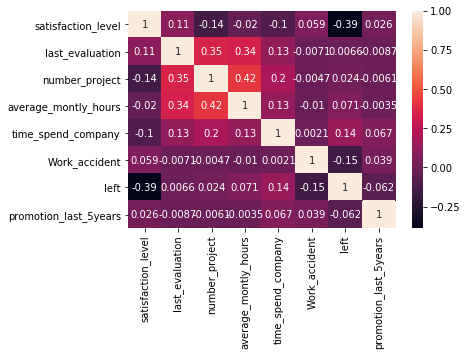

In [39]:
sns.heatmap(corr,annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

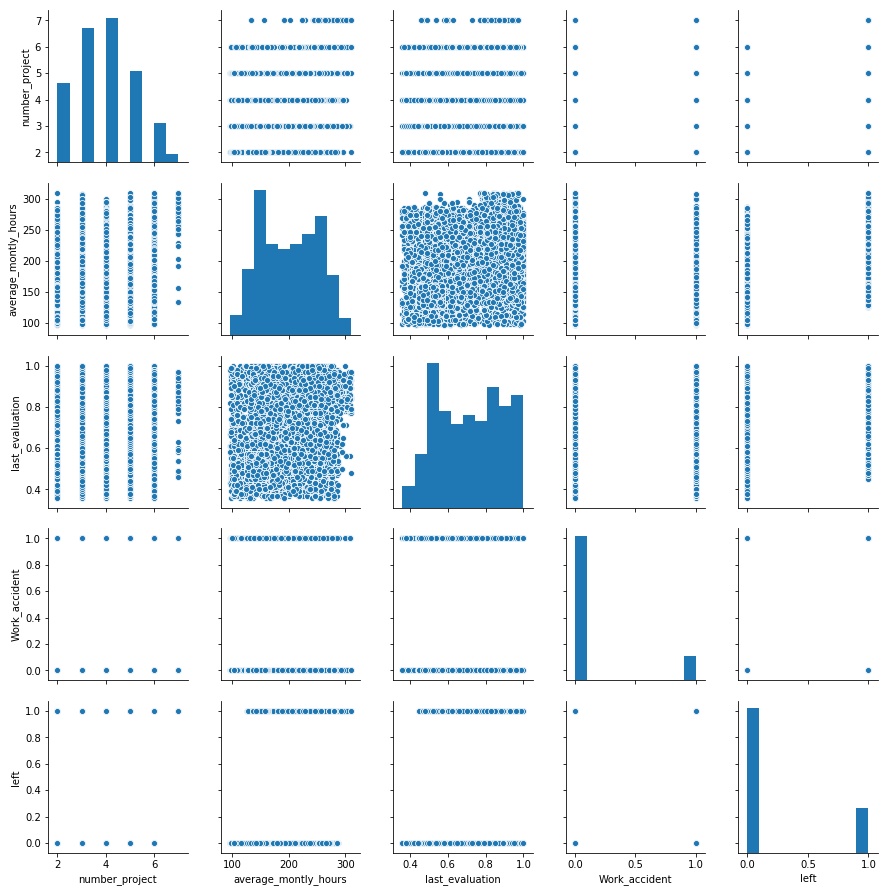

In [42]:
#Задание 4. Визуализировать несколько взаимосвязей между переменными
sns.pairplot(data,vars=['number_project','average_montly_hours','last_evaluation','Work_accident','left'])

In [106]:
#Задание 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
print(sts.ttest_ind(data['number_project'], data['time_spend_company']))
print(sts.ttest_ind(data['number_project'], data['average_montly_hours']))
print(sts.ttest_ind(data['satisfaction_level'], data['time_spend_company']))

Ttest_indResult(statistic=19.536753519083355, pvalue=1.7938911515379e-84)
Ttest_indResult(statistic=-483.54229603425085, pvalue=0.0)
Ttest_indResult(statistic=-238.58170166684755, pvalue=0.0)


sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: salary, dtype: int64


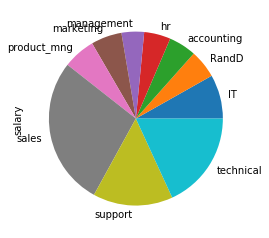

In [65]:
#Задание 6. Рассчитать кол-во работников в каждом департаменте
data.head(1)
dt=data.groupby(data['sales']).count()
dt['salary'].plot(kind="pie")
print(dt['salary'])

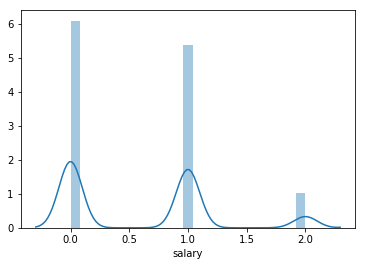

In [77]:
#Задание 7. Визуализировать распределение сотрудников по зарплатам
data.groupby(data['salary']).count()
# 2 - high; 1 - medium; 0 -low
data['salary']=data['salary'].replace('high',2)
data['salary']=data['salary'].replace('medium',1)
data['salary']=data['salary'].replace('low',0) 
sns.distplot(data['salary'], bins=25)
    

In [79]:
#Задание 8. Распределение сотрудников по зарплатам совместно с департаментами


In [100]:
#Задание 9. Кол-во сотрудников, которые покинули компанию
count_left=data[data['left']==1].count()
count_=data.count()
print(count_left['left'])
#В процентах
count_left['left']/count_['left']*100

3571


23.80825388359224

In [108]:
#Задание 10.
data.head(1)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   

   salary  
0       0

In [139]:
#Увольняются работники, которые работают больше 200 часов в месяц в среднем
data_left1=data.loc[data['average_montly_hours']>200, 'left']
data_left2=data.loc[data['average_montly_hours']<=200, 'left']
sts.ttest_ind(data_left1, data_left2)


Ttest_indResult(statistic=5.193359906168156, pvalue=2.09234273556547e-07)

In [143]:
#Увольняются работники, у которых не было повышения последние 5 лет
data_promotion1=data.loc[data['promotion_last_5years']==0, 'left']
data_promotion2=data.loc[data['promotion_last_5years']==1, 'left']
sts.ttest_ind(data_promotion1, data_promotion2)

Ttest_indResult(statistic=7.581195349367636, pvalue=3.6240472241469694e-14)

In [144]:
#Увольняются работники, у которых был факт наличия инцидента на рабочем месте
data_accident1=data.loc[data['Work_accident']==0, 'left']
data_accident2=data.loc[data['Work_accident']==1, 'left']
sts.ttest_ind(data_accident1, data_accident2)

Ttest_indResult(statistic=19.16580403309018, pvalue=6.61304940045375e-81)